<a href="https://colab.research.google.com/github/NecipOz/Kaggle/blob/main/androidgames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv("android-games.csv")
df = df0.copy()

In [3]:
df.sample(15)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
856,31,Beat Craft,161111,5.0 M,4,1.2,2.5,0.0,GAME MUSIC,117376,21217,8910,3356,10249,False
393,94,Ludo Neo-Classic : King of the Dice Game,92835,10.0 M,4,0.4,0.6,0.0,GAME BOARD,61320,9118,5819,3789,12787,False
1245,20,Hooked Inc: Fisher Tycoon,1216891,10.0 M,4,1.1,2.5,0.0,GAME SIMULATION,881238,188929,87539,20875,38307,False
1316,91,레알팜 : 진짜 농산물 주는 게임,382940,5.0 M,4,0.1,0.0,0.0,GAME SIMULATION,242138,74428,36624,8536,21211,False
321,22,Backgammon Plus,466525,5.0 M,3,2212.2,0.2,0.0,GAME BOARD,271493,22728,15722,8505,148075,False
659,34,Gacha Club,1222505,10.0 M,4,5.9,12.9,0.0,GAME CASUAL,976018,118010,42649,18392,67434,False
1422,97,Basketball Kings: Multiplayer,252130,5.0 M,4,0.0,0.0,0.0,GAME SPORTS,198907,28125,12033,3178,9884,False
862,37,My Singing Monsters: Dawn of Fire,130606,1.0 M,4,0.4,0.9,0.0,GAME MUSIC,102708,14153,5413,2297,6032,False
1202,77,Guardian Tales,364398,1.0 M,4,5.3,10.4,0.0,GAME ROLE PLAYING,301336,35050,10864,4773,12372,False
978,53,パズル＆ドラゴンズ(Puzzle & Dragons),594490,10.0 M,3,0.1,0.3,0.0,GAME PUZZLE,332022,79166,56797,26915,99587,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


In [5]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1730.0,5.038671e+01,2.893674e+01,1.0,25.00,50.0,75.00,100.00
total ratings,1730.0,1.064332e+06,3.429250e+06,32993.0,175999.25,428606.5,883797.00,86273129.00
average rating,1730.0,3.908092e+00,2.909734e-01,2.0,4.00,4.0,4.00,4.00
growth (30 days),1730.0,3.217359e+02,6.018915e+03,0.0,0.10,0.5,1.70,227105.70
growth (60 days),1730.0,1.225550e+02,2.253892e+03,0.0,0.20,1.0,3.30,69441.40
price,1730.0,1.094220e-02,2.149873e-01,0.0,0.00,0.0,0.00,7.49
5 star ratings,1730.0,7.622315e+05,2.538658e+06,13975.0,127730.00,296434.0,619835.75,63546766.00
4 star ratings,1730.0,1.164366e+05,3.021631e+05,2451.0,20643.00,50980.5,101814.00,5404966.00
3 star ratings,1730.0,5.706307e+04,1.495314e+05,718.0,9652.50,25078.0,52295.00,3158756.00
2 star ratings,1730.0,2.710336e+04,8.154542e+04,266.0,4262.25,10675.5,23228.75,2122183.00


In [7]:
df.describe(include=[object]).T

,count,unique,top,freq
title,1730,1675,Solitaire,36
installs,1730,9,10.0 M,805
category,1730,17,GAME CARD,126


## Category Column: Remove "Game " part from the items

In [8]:
df.category.value_counts(dropna=False)

GAME CARD            126
GAME WORD            104
GAME PUZZLE          100
GAME TRIVIA          100
GAME STRATEGY        100
GAME SPORTS          100
GAME SIMULATION      100
GAME ROLE PLAYING    100
GAME RACING          100
GAME ACTION          100
GAME ADVENTURE       100
GAME EDUCATIONAL     100
GAME CASUAL          100
GAME CASINO          100
GAME BOARD           100
GAME ARCADE          100
GAME MUSIC           100
Name: category, dtype: int64

In [9]:
df["category"] = df.category. apply(lambda x: x[5:].strip())
df["category"].value_counts()

CARD            126
WORD            104
PUZZLE          100
TRIVIA          100
STRATEGY        100
SPORTS          100
SIMULATION      100
ROLE PLAYING    100
RACING          100
ACTION          100
ADVENTURE       100
EDUCATIONAL     100
CASUAL          100
CASINO          100
BOARD           100
ARCADE          100
MUSIC           100
Name: category, dtype: int64

In [10]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid'],
      dtype='object')

## Ratings Column: Remove letters and convert the items to floats. Result items are million ratings 

In [11]:
df.installs.value_counts(dropna=False)

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

In [12]:
df.installs[0][:-4]

'500'

In [13]:
def install(num):
  if num.strip()[-1] == "M":
    return int(num[:-4])
  if num.strip()[-1] == "k":
    return int(num[:-4])*0.001
df["installs"].apply(lambda x: install(x))

0       500.0
1       500.0
2       100.0
3       100.0
4       500.0
        ...  
1725      1.0
1726      1.0
1727     10.0
1728      5.0
1729     10.0
Name: installs, Length: 1730, dtype: float64

In [14]:
df["installs_num"] = df["installs"].apply(lambda x: install(x))


In [15]:
df.installs_num.value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_num, dtype: int64

In [16]:
df.installs.str.extract(r'(\d+)').value_counts()

10      805
50      252
5       245
100     207
1       192
500      27
1000      2
dtype: int64

## Control rating stars match with total rating and create a avr. rating score column.

In [17]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid', 'installs_num'],
      dtype='object')

In [18]:
df["ratings_control"] = df['total ratings']- (df['5 star ratings']+\
                                              df['4 star ratings']+df['3 star ratings']\
                                              +df['2 star ratings']+df['1 star ratings'])

In [19]:
df[(df.ratings_control < 0) | (df.ratings_control > 4)]

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,installs_num,ratings_control
403,3,Solitaire,1590733,100.0 M,4,0.4,0.9,0.0,CARD,431463,90350,40065,15998,70189,False,100.0,942668
404,3,Solitaire,1590733,100.0 M,4,0.4,0.9,0.0,CARD,418115,47121,16871,6574,18567,False,100.0,1083485
405,3,Solitaire,1590733,100.0 M,4,0.4,0.9,0.0,CARD,299715,68177,20617,4959,12653,False,100.0,1184612
412,10,Solitaire,648068,50.0 M,4,0.0,0.0,0.0,CARD,1117298,308402,82191,25750,57090,False,50.0,-942663
414,10,Solitaire,648068,50.0 M,4,0.0,0.0,0.0,CARD,418115,47121,16871,6574,18567,False,50.0,140820
415,10,Solitaire,648068,50.0 M,4,0.0,0.0,0.0,CARD,299715,68177,20617,4959,12653,False,50.0,241947
418,13,Solitaire,507250,50.0 M,4,0.9,1.9,0.0,CARD,1117298,308402,82191,25750,57090,False,50.0,-1083481
419,13,Solitaire,507250,50.0 M,4,0.9,1.9,0.0,CARD,431463,90350,40065,15998,70189,False,50.0,-140815
421,13,Solitaire,507250,50.0 M,4,0.9,1.9,0.0,CARD,299715,68177,20617,4959,12653,False,50.0,101129
427,19,Solitaire,406124,10.0 M,4,0.3,0.7,0.0,CARD,1117298,308402,82191,25750,57090,False,10.0,-1184607


In [20]:
df.iloc[:,9:14]

,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
0,63546766,4949507,3158756,2122183,12495915
1,28339753,2164478,1253185,809821,4709492
2,18777988,1812094,1050600,713912,4308998
3,13018610,1552950,774012,406184,2219794
4,9827328,2124154,1047741,380670,1084340
...,...,...,...,...,...
1725,101036,3607,3237,1229,3297
1726,88950,14856,4297,1385,2103
1727,64184,18332,9385,6688,12132
1728,99987,4766,1469,953,2353


In [21]:
df["avg_ranking"] = ((df.iloc[:,9]*5)+ (df.iloc[:,10]*4)+(df.iloc[:,11]*3)\
+(df.iloc[:,12]*2)+(df.iloc[:,13]))/((df.iloc[:,9])+ (df.iloc[:,10])+(df.iloc[:,11])\
+(df.iloc[:,12])+(df.iloc[:,13]))

In [22]:
df["avg_ranking"] 

0       4.216242
1       4.304170
2       4.126486
3       4.265578
4       4.329449
          ...   
1725    4.760191
1726    4.677241
1727    4.045402
1728    4.817627
1729    3.593839
Name: avg_ranking, Length: 1730, dtype: float64

# Outlier Analysis

## Growth Rate


In [23]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid', 'installs_num', 'ratings_control',
       'avg_ranking'],
      dtype='object')

In [24]:
df['average rating'].value_counts(dropna=False)

4    1572
3     157
2       1
Name: average rating, dtype: int64

In [25]:
df[['growth (30 days)']].value_counts(dropna=False)

growth (30 days)
0.0                 269
0.1                 234
0.2                 137
0.3                 114
0.4                  87
                   ... 
24.0                  1
21.2                  1
19.7                  1
19.1                  1
227105.7              1
Length: 186, dtype: int64

In [26]:
df[df['growth (30 days)']>10000][['growth (30 days)','growth (60 days)']].value_counts()

growth (30 days)  growth (60 days)
12602.3           0.7                 1
15364.2           5.2                 1
17025.0           0.1                 1
28062.9           9.8                 1
37994.4           2.6                 1
55880.6           5.3                 1
69928.5           1.6                 1
227105.7          2.2                 1
dtype: int64

In [27]:
len(df[df['growth (30 days)']>100])

72

In [28]:
len(df[df['growth (30 days)']>1000])

34

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


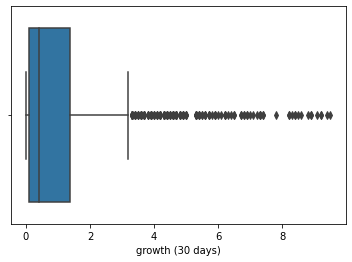

In [29]:
sns.boxplot(df[df['growth (30 days)']<10]['growth (30 days)'])
plt.show()

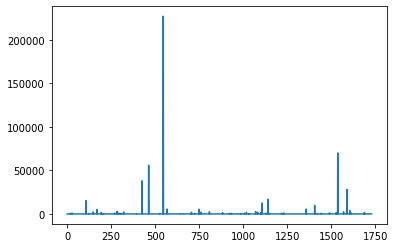

In [30]:
df['growth (30 days)'].plot()

In [31]:
df['growth (60 days)'].value_counts(dropna=False)

0.0       180
0.1       166
0.2       104
0.3        89
0.5        66
         ... 
11.8        1
19.3        1
12.9        1
9.7         1
5556.2      1
Name: growth (60 days), Length: 206, dtype: int64

In [32]:
df[df['growth (60 days)']>100][['growth (30 days)','growth (60 days)']].value_counts(dropna=False)

growth (30 days)  growth (60 days)
0.0               264.0               1
1.4               7584.9              1
1117.1            1107.1              1
625.9             1251.8              1
134.8             269.5               1
87.5              174.9               1
78.6              157.2               1
76.2              152.4               1
74.3              148.5               1
41.3              235.8               1
28.9              113.2               1
17.1              5556.2              1
8.4               1019.6              1
5.7               121.1               1
3.9               42875.2             1
3.4               69441.4             1
1.3               4012.8              1
0.0               353.1               1
1.2               6004.4              1
                  630.8               1
0.8               863.6               1
0.7               426.0               1
0.5               481.5               1
0.4               718.2               1
0.3  

In [33]:
len(df[df['growth (60 days)']>1000])

12

In [34]:
len(df[df['growth (60 days)']>100])

33

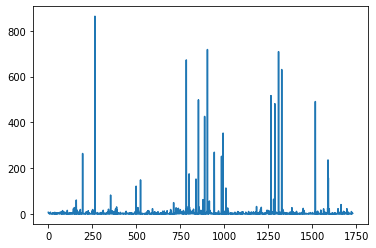

In [35]:
df[df['growth (60 days)']<1000]['growth (60 days)'].plot();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


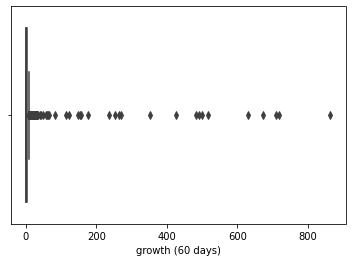

In [36]:
sns.boxplot(df[df['growth (60 days)']<1000]['growth (60 days)']);

In [37]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid', 'installs_num', 'ratings_control',
       'avg_ranking'],
      dtype='object')

In [38]:
df.price.value_counts(dropna=False)

0.00    1723
1.99       3
7.49       1
2.99       1
1.49       1
0.99       1
Name: price, dtype: int64

In [39]:
df.paid.value_counts(dropna=False)

False    1723
True        7
Name: paid, dtype: int64

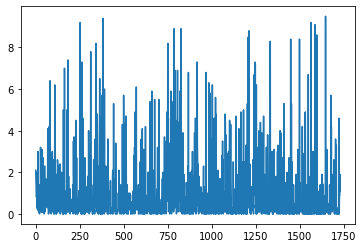

In [40]:
df[df['growth (30 days)']<10]['growth (30 days)'].plot();

# Conclusion about the outliers ans null values
It is seem that there is no null values in the columns. Also there is no unusual values in the columns except growth rates. In 'growth (30 days)', 'growth (60 days)' columns there are extreme growth rates such as 227000. Can these values be admitted as outlier? There are 72 values greater than 100 in 'growth (30 days)' and 33 values greater than 100 in 'growth (60 days)'. 4 values match so totaly 101 (5.83 % of total) games have growth rates (either 30 or 60 days) greater than 100. To categorize these columns can be helpful to visualize the data.

## Analysis by game category

In [41]:
df.sample(5)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid,installs_num,ratings_control,avg_ranking
380,81,Chess for Android,109162,10.0 M,4,0.0,0.1,0.0,BOARD,72559,13043,8357,3114,12088,False,10.0,1,4.198881
1729,100,Pinturillo 2,108917,10.0 M,3,1.1,2.5,0.0,WORD,50813,16480,11825,6166,23631,False,10.0,2,3.593839
846,21,Guitar Band Battle,237878,10.0 M,4,0.6,1.1,0.0,MUSIC,149371,35947,17998,8445,26114,False,10.0,3,4.151933
148,49,Crafting and Building,326177,10.0 M,4,11.7,27.8,0.0,ADVENTURE,248268,27790,11796,6681,31639,False,10.0,3,4.393020
1129,4,Flight Pilot Simulator 3D Free,2651253,100.0 M,4,965.5,0.9,0.0,ROLE PLAYING,1680842,413154,208205,85294,263756,False,100.0,2,4.192657


In [42]:
df.groupby("category")[["total ratings", "installs_num", "average rating", "avg_ranking"]].mean()

,total ratings,installs_num,average rating,avg_ranking
category,,,,
ACTION,4.011344e+06,74.100000,3.890000,4.258145
ADVENTURE,8.935617e+05,18.030000,3.850000,4.263985
ARCADE,1.793780e+06,71.610000,3.910000,4.294111
BOARD,4.457431e+05,21.230000,3.930000,4.330607
CARD,3.326041e+05,12.484127,3.936508,4.422010
CASINO,3.619031e+05,7.715000,3.950000,4.449610
CASUAL,2.470866e+06,63.970000,3.950000,4.346847
EDUCATIONAL,1.529804e+05,17.895000,3.890000,4.253514
MUSIC,2.163020e+05,12.487000,3.800000,4.198792


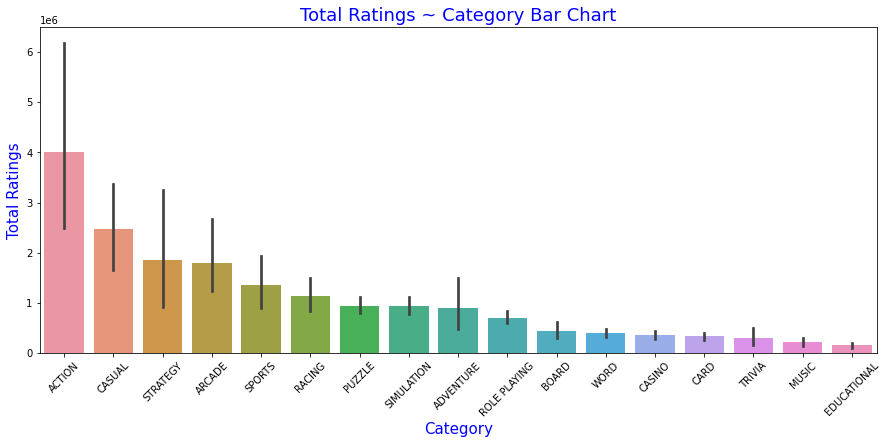

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x="category", y="total ratings", data=df,
            order=df.groupby("category")["total ratings"].mean().sort_values(ascending=False).index)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Total Ratings", color="blue", fontsize=15)
plt.title("Total Ratings ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

It is seem that categories with high total ratings are "action", "casual", "strategy" and "arcade". However, categories with low total ratings are "educational" and "music" categories. 

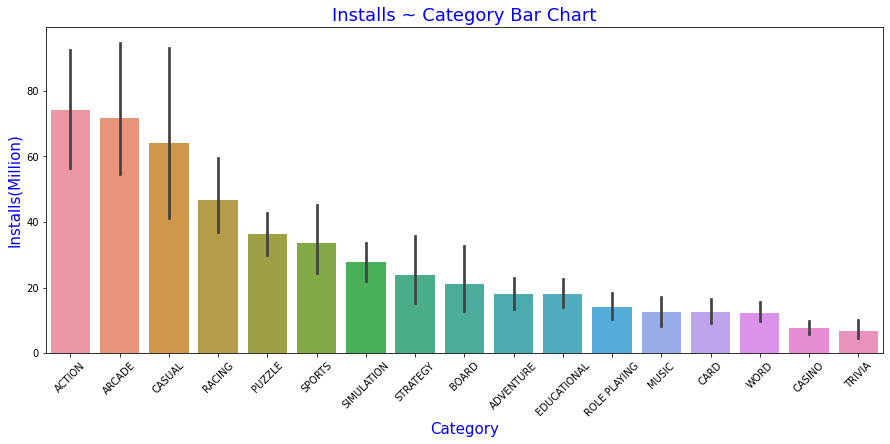

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x="category", y="installs_num", data=df,
            order=df.groupby("category")["installs_num"].mean().sort_values(ascending=False).index)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Installs(Million)", color="blue", fontsize=15)
plt.title("Installs ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

Install numbers are like total ratings. Categories with high installs are "action", "arcade", "casual" and "racing". However, categories with low installs are "casino" and "trivia" categories. While the total ratings of strategy games are high, installs number of strategy games are not high as much as ratings. 

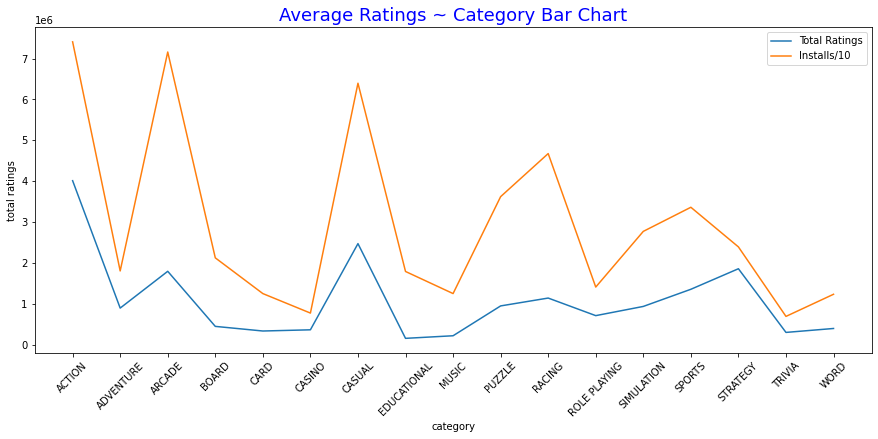

In [66]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.lineplot(x="category", y="total ratings", data=df,ci=None, label="Total Ratings")
ax = sns.lineplot(x="category", y=df["installs_num"]*100000, data=df,ci=None, label="Installs/10")
plt.legend()
plt.title("Average Ratings ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

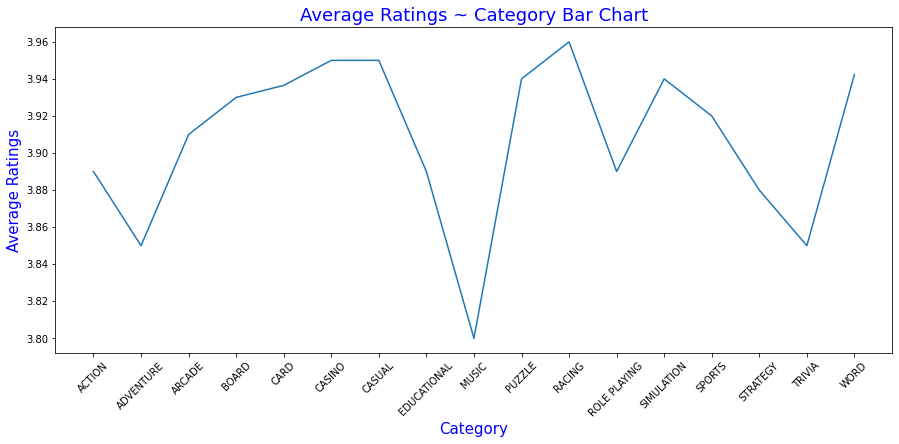

In [49]:
plt.figure(figsize=(15,6))
sns.lineplot(x="category", y="average rating", data=df,ci=None)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Average Ratings", color="blue", fontsize=15)
plt.title("Average Ratings ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

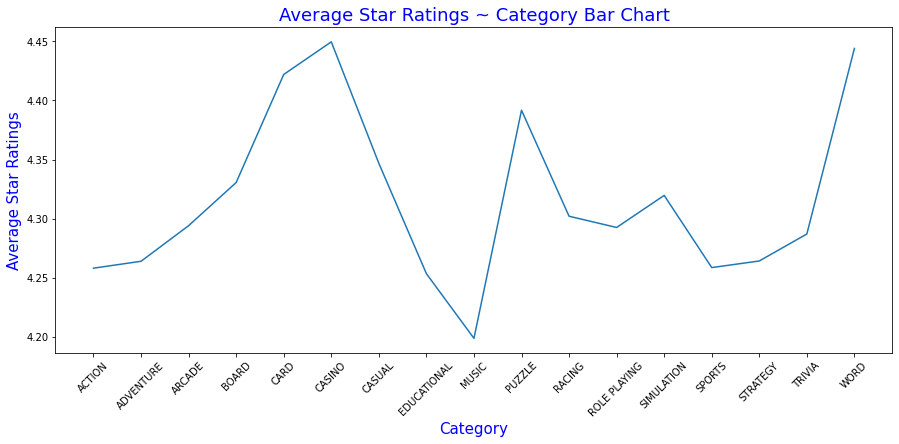

In [45]:
plt.figure(figsize=(15,6))
sns.lineplot(x="category", y="avg_ranking", data=df,ci=None)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Average Star Ratings", color="blue", fontsize=15)
plt.title("Average Star Ratings ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

Average star ratings of categories is very close to each other and between 4.20 and 4.45. However, categories with highest average star ratings are "casino" and "word and category with lowest average star ratings is "music".:

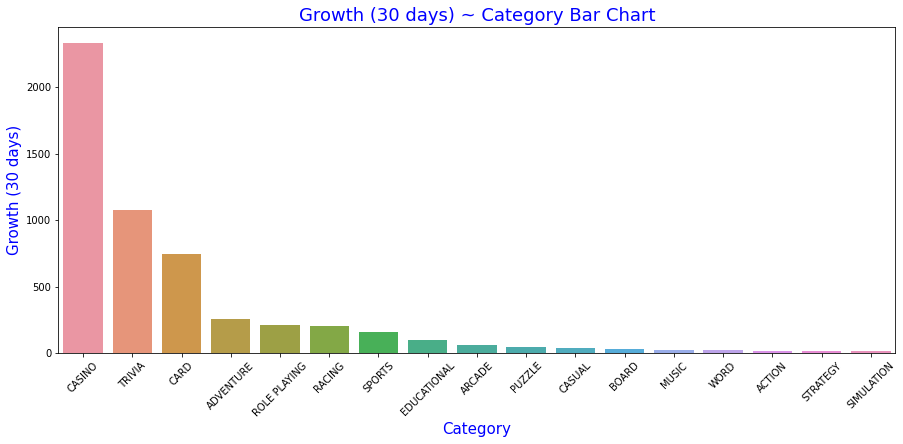

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(x="category", y="growth (30 days)", data=df, ci=None,
            order=df.groupby("category")["growth (30 days)"].mean().sort_values(ascending=False).index)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Growth (30 days)", color="blue", fontsize=15)
plt.title("Growth (30 days) ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

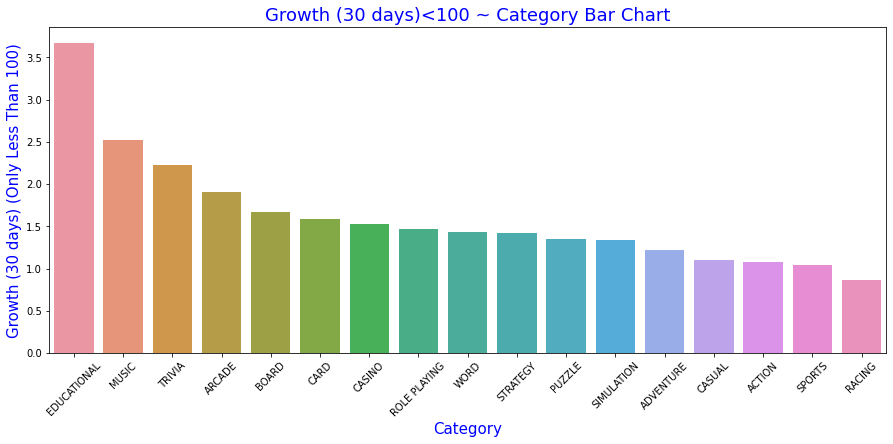

In [47]:
plt.figure(figsize=(15,6))
sns.barplot(x="category", y="growth (30 days)", data=df[df["growth (30 days)"]<100], ci=None,
            order=df[df["growth (30 days)"]<100].groupby("category")["growth (30 days)"].mean().sort_values(ascending=False).index)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Growth (30 days) (Only Less Than 100)", color="blue", fontsize=15)
plt.title("Growth (30 days)<100 ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

The highest growth rates are in the categories "casino", "trivia" and "card". If we restrict the growth rate in the interval [0,100], all the growth rates are smaller than 4 and the highest growth rate is in "education" category.

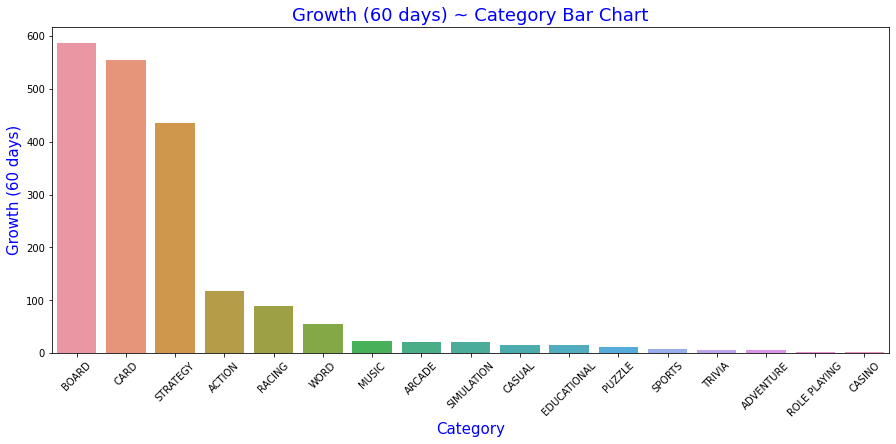

In [113]:
plt.figure(figsize=(15,6))
sns.barplot(x="category", y="growth (60 days)", data=df, ci=None,
            order=df.groupby("category")["growth (60 days)"].mean().sort_values(ascending=False).index)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Growth (60 days)", color="blue", fontsize=15)
plt.title("Growth (60 days) ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

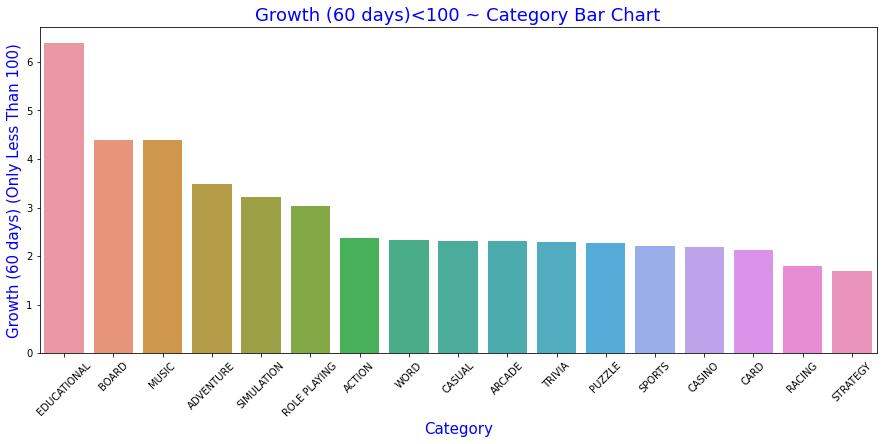

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x="category", y="growth (60 days)", data=df[df["growth (60 days)"]<100], ci=None,
            order=df[df["growth (60 days)"]<100].groupby("category")["growth (60 days)"].mean().sort_values(ascending=False).index)
plt.xlabel("Category", color="blue", fontsize=15)
plt.ylabel("Growth (60 days) (Only Less Than 100)", color="blue", fontsize=15)
plt.title("Growth (60 days)<100 ~ Category Bar Chart", color="blue", fontsize=18)
plt.xticks(rotation=45);

The highest growth rates (60 days) are in the categories "board", "card" and "strategy". Although the 30 days growth rate of "casino" category is the highest, the 60 days growth rate of "casino" category is the lowest. This is interesting. If we restrict the 60 days growth rate in the interval [0,100], all the growth rates are smaller than 7 and the highest growth rate is in "education" category.

# Paid Column
There are only 7 paid games. Therefore, analysis of games according to the prices is no meaning.

In [68]:
df.paid.value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [110]:
df.groupby("category")[["paid"]].sum()

,paid
category,
ACTION,0
ADVENTURE,0
ARCADE,2
BOARD,0
CARD,1
CASINO,0
CASUAL,0
EDUCATIONAL,0
MUSIC,2


In [69]:
df.columns

Index(['rank', 'title', 'total ratings', 'installs', 'average rating',
       'growth (30 days)', 'growth (60 days)', 'price', 'category',
       '5 star ratings', '4 star ratings', '3 star ratings', '2 star ratings',
       '1 star ratings', 'paid', 'installs_num', 'ratings_control',
       'avg_ranking'],
      dtype='object')

# Correlations:

In [86]:
df[["total ratings","installs_num","average rating","avg_ranking"]].corr()

,total ratings,installs_num,average rating,avg_ranking
total ratings,1.000000,0.676523,0.044468,0.008909
installs_num,0.676523,1.000000,0.042961,-0.039469
average rating,0.044468,0.042961,1.000000,0.675101
avg_ranking,0.008909,-0.039469,0.675101,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


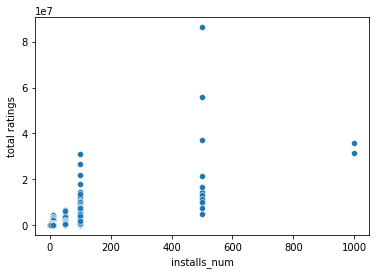

In [83]:
sns.scatterplot(df["installs_num"],df["total ratings"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


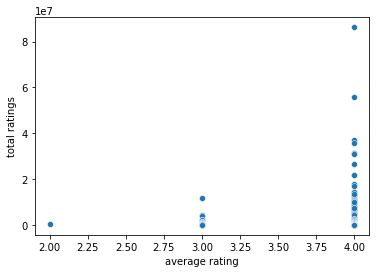

In [87]:
sns.scatterplot(df["average rating"],df["total ratings"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


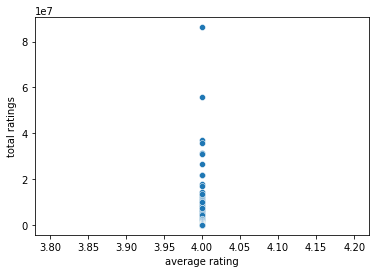

In [92]:
sns.scatterplot(df[df["average rating"]>3.99]["average rating"],df["total ratings"]);

There is a positive strong correlation between total ratings and installs. However, there is no correlation between average ratings and total ratings, and average ratings and installs. So there is no relation between total ratings and average ratings.